Here are some extra exercises for Lab 1. They are not mandatory, but are generally fun to do, and you should consider them if you are planning to do some future work in Python.

---

# Conway's Game of Life

<center>
<img src="imgs/john-conway.jpg" width="470"/>
</center>

</br>

**Game of Life** is a cellular automaton devised by the British mathematician John Horton Conway in 1970. If you happen not to have heard of the Game of Life before, try it out yourself at [this website](https://playgameoflife.com/) and see what it is about. It's not a *game* in the traditional sense, because there are no players, rather a simulation of an evolving system (often referred to as a *zero-player game*).

The universe of the Game of Life is a two-dimensional grid of squares (cells), each of which is in one of two possible states, live or dead (or 1 and 0). At each step in time, some cells are born, some die, and some stay the same, according to the following rules:

1. A live cell with **fewer than two** live neighbors **dies** of underpopulation.
2. A live cell with **two or three** live neighbors **lives** on to the next generation.
3. A live cell with **more than three** live neighbors **dies** of overpopulation.
4. A dead cell with **exactly three** live neighbors becomes a live cell as if by reproduction.

The user is supposed to draw some initial configuration of live and dead cells and watch how the system evolves with time. Not all initial configurations of cells will lead to interesting results. Some will die out in a few time steps, but some will evolve into complex shapes with really cool properties. I highly encourage you to play around with the Game of Life yourself before we implement it in Pyhton.

<center>
<img src="imgs/glider.png" width="600"/>
</center>

</br>


For example, the **glider** is a configuration that moves across the grid with each time step. The image above shows consecutive time steps of a glider, with black squares denoting live cells. **Note that after four steps the whole configuration has shifted one cell to the right and one cell down.**

## *Exercise 1: Implement Game of Life as a class
Implement the Game of Life's board as class `GameOfLife`. The class should have the following methods:
- `__init__(self, width, height, prob)`: Initializes a random Game of Life board (in terms of live and dead cells) of the given width and height. Creates the board using the `get_random_board` method and stores it in the instance variable `self.board` (already done for you).

- `get_random_board(self, width, height, prob)`: Returns a random board of the given width and height (a 2D list of zeros and ones) with each cell being live with probability `p`.

- `set_cell(self, x, y, state)`: Sets the cell at position (x, y) to the given state (1 for live, 0 for dead).

- `print_board(self)`: Prints the board to the console, with an example output shown below. You can use `X` to denote live cells and `.` to denote dead cells.
```
. . . . .
. . X . .
X . X . .
. X X . .
. . . . .
```
- `count_live_neighbors(self, x, y)`: Counts and returns the live neighbors of the cell at position (x, y). **Cells outside the board should be considered dead.**

- `step(self)`: Generates the next iteration of the board according to the rules of the Game of Life and updates `self.board` to the new state. This method should probably make use of the previously implemented `count_live_neighbors` and `set_cell` methods.

In [18]:
import random

class GameOfLife:
    def __init__(self, width, height, prob=0.3):
        self.height = height
        self.width = width
        self.prob = prob
        self.board = self.get_random_board(width, height)

    def get_random_board(self, width, height):
        board = []
        for n in range(self.height):
            row = []
            for i in range(self.width):
                cell = random.random()
                if cell < self.prob:
                    row.append(1)
                else:
                    row.append(0)
            board.append(row)
        return board
        
    def set_cell(self, x, y, state):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.board[y][x] = state
        else:
            print("x and y exceed board")

    def print_board(self):
        for row in self.board:
            line = ""
            for cell in row:
                if cell == 1:
                    line += "X "
                else:
                    line += ". "
            print(line)

    def count_live_neighbors(self, x, y):
        count = 0
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.width and 0 <= ny < self.height:
                    count += self.board[ny][nx]
        return count
        
    def step(self):
        new1_board = []
        for y in range(self.height):
            new1_row = []
            for x in range(self.width):
                neighbors = self.count_live_neighbors(x,y)
                cell = self.board[y][x]
                if cell == 1:
                    if neighbors < 2:
                        new1_row.append(0)
                    elif neighbors in (2,3):
                        new1_row.append(1)
                    else:
                        new1_row.append(0)
                else:
                    if neighbors == 3:
                        new1_row.append(1)
                    else:
                        new1_row.append(0)
            new1_board.append(new1_row)
        self.board = new1_board
        return self.board               

### Animate the Game of Life!

If you successfully implemented the Game of Life, you can try to put it in a loop and animate it. The loop should print the board, wait for a second, generate the next step, and repeat. You can use the `time` module from Python's standard library to wait for a second between each step. IPython has a built-in function `clear_output` that can be used to clear the output of a cell in a Jupyter notebook - so you can print the board in the same cell, and it will look like it is being updated.

The code below should animate a glider moving across the board if you implemented everything correctly! **Make sure to see how a random board evolves as well - it can be quite mesmerizing!**

In [19]:
from IPython.display import clear_output
import time

# Create a GameOfLife instance, board size 10x10, with 30% probability of a cell being alive
gol = GameOfLife(10, 10, prob=0.3)

for _ in range(20):    # run for 20 steps
    clear_output(wait=False)    # clear the output
    gol.print_board()           # print the board
    gol.step()                  # generate the next iteration
    time.sleep(1)               # wait for a second

. . . . . . . . . . 
. X X X . . . . . . 
. X X X . . . . . . 
. . X X X . . . . . 
. . . . X X . . . . 
. . . . X X X . . . 
. . . . X X . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 


## *Exercise 2: Wrapping it up into an executable script

If you have successfully implemented the Game of Life, you can put all the code into a single Python file, called `game_of_life.py` for example. You can then run the game from the command line by executing the command:

```bash
python game_of_life.py
```

You can use the `argparse` module from Python's standard library to parse command-line arguments and set the size of the board, the probability of a cell being alive, and the number of steps the simulation should run for. You can also use the `time` module to measure how long the simulation takes to run.

1. Create a new Python file `game_of_life.py` in the same directory as this notebook. Copy all relevant functions you implemented above into this file. Upon running the file, the Game of Life should be animated in the console. The user should be able to set the size of the board, the probability of a cell being alive, and the number of steps the simulation should run for.

An example of how to use `argparse` to pass arguments to a python script is given below:
```python
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--size", "-s", type=int, default=10, help="Size of the board")
parser.add_argument("--prob", "-p", type=float, default=0.2, help="Probability of a cell being alive")
parser.add_argument("--steps", "-n", type=int, default=20, help="Number of steps to run the simulation for")

args = parser.parse_args()
args.size   # this will contain the size of the board
args.prob   # this will contain the probability of a cell being alive
args.steps  # this will contain the number of steps to run the simulation for

...

```
If we wanted to run the simulation with a board of size 20, a probability of 0.3, and for 50 steps, we would run the script as follows:
```bash
python game_of_life.py --size 20 --prob 0.3 --steps 50
```
 or:
```bash
python game_of_life.py -s 20 -p 0.3 -n 50
```

You should also take a look at the [official Python documentation](https://docs.python.org/3/library/argparse.html) for more information on how to use the `argparse` module.

**NOTE:** IPython's `clear_output` function will not work in the console, so instead of this, you can import the `os` module and use the `os.system('cls')` on Windows or `os.system('clear')` on Unix systems to clear the console output between each step.

---
## *Excercise 3: Pachinko

Pachinko is a Japanese gambling game played on a vertical board. The board has pegs protruding from the surface, and the player has to drop a ball from the top. The ball bounces off the pegs and can land in one of the pockets below. The pockets have different values each, and the prize is determined by the pocket in which the ball lands.

<center>
    <p float="left">
        <img src="imgs/pachinko1.jpg", width=300>
        <img src="imgs/pachinko.png", width=450>
    </p>
</center>

The figure above shows an actual pachinko machine (left) and a simplified version of a pachinko board (right). **Assume the ball has an equal chance of bouncing either left or right off each peg.**

One can simulate the results of such a game in many ways. One example is by assigning a value of 0 to each left bounce and 1 to each right bounce. As the ball falls through $n$ rows, its final position (bin index) is determined by the sum of the values in each row.

1. Create a class called `Pachinko` that represents a simplified pachinko board of $k$ rows. The class should have a method called `drop_balls` that simulates dropping $n$ balls through the board and returns the list of $n$ integers, corresponding to the final position (bin index) of each ball.
2. Create a function called `plot_pachinko`. It should take a Pachinko object and the number of balls $n$ as arguments. The function should simulate dropping $n$ balls through the board and return a histogram of the distribution of balls in all bins (you can use the `plot_hist` function from the previous exercise to return the histogram).
3. Plot the histogram of the results of dropping 1000 balls through a pachinko board with $k=5, 10, 20$ rows. What shape does this distribution converge to as the number of rows increases? *What exactly does this experiment have in common with the means of multiple dice rolls?*
4. You encounter a 10-row pachinko machine. One game (equivalent of dropping one ball) costs you 10 yen. If the ball lands in either the first or last bin, you win 2500 yen. You can play as many times as you wish. Will this machine make the casino go bankrupt? Conduct a simulation to verify your prediction.

In [22]:
class Pachinko:
    def __init__(self, k):
        self.k = k

    def drop_balls(self, n):
        results =[]
        for m in range(n):
            bin_index = 0
            for i in range(self.k):
                fall = random.randint(0,1)
                bin_index += fall
            results.append(bin_index)
        return results

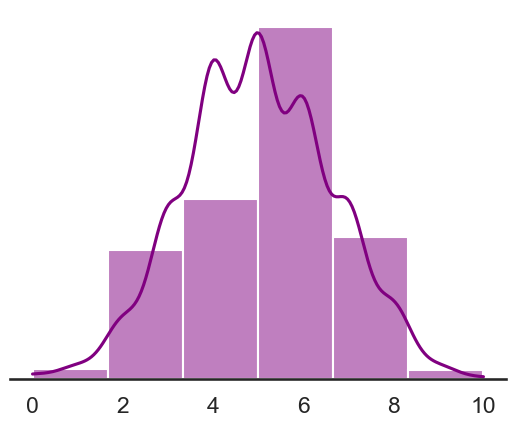

In [26]:
from helpers.plotting import plot_hist

def plot_pachinko(pachinko, n):
    result = pachinko.drop_balls(n)
    return plot_hist(result), result

board = Pachinko(10)
hist, result = plot_pachinko(board, 1000)

In [32]:
def play(pachinko, number):
    res = pachinko.drop_balls(number)
    general_profit = 0
    for r in res:
        if r == 0 or r == 10:
            profit = 2500 - 10
        else:
            profit = -10
        general_profit += profit
    avg = general_profit / number
    return general_profit, avg

board = Pachinko(10)
x = play(board, 100000)
print(x)

(-477500, -4.775)
